Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
X, y = load_diabetes(return_X_y=True)

In [60]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [50]:
class g_boost():
    
    def __init__(self,n_trees=10, max_depth=3, eta=1):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.eta = eta
        self.trees = []      
   
    def bias(self,y, z):
        return (y - z)
    
    def mean_squared_error(self,y_real, prediction):
        return (sum((y_real - prediction)**2)) / len(y_real)
    
    def R2(self,y,y_pred):
        return 1- ((y_pred - y)**2).sum()/((y-y.mean())**2).sum()
      
    def predict(self,X):
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
        return np.array([sum([self.eta * alg.predict([x])[0] for alg \
                              in self.trees]) for x in X])
     
    def fit(self,X_train,y_train): 
        self.X_train = X_train
        self.y_train = y_train
    # Деревья будем записывать в список
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
            else:
                # Получим ответы на текущей композиции
                target = self.predict(X_train)          
                # алгоритмы начиная со второго обучаем на сдвиг
                tree.fit(X_train, self.bias(y_train, target))        
            self.trees.append(tree)
    
    def  train_test(self,metrika = 'r2'):
        if metrika!='r2':
            return self.mean_squared_error(self.y_train,self.predict(self.X_train))
        else:
            return self.R2(self.y_train,self.predict(self.X_train))
    
    def metrika_test(self, X_test,y_test, metrika = 'r2'):
        if metrika!='r2':
            return self.mean_squared_error(y_test,self.predict(X_test))
        else:
            return self.R2(y_test,self.predict(X_test))
        
           

In [69]:
save_result=pd.DataFrame(columns=['n_trees','max_depth','eta','R2','MSE'])

In [70]:
def rec(n_trees,max_depth,eta,R2,MSE):
    save_result.loc[len(save_result)] = [n_trees,max_depth,eta,R2,MSE]

In [77]:
for l in  [5,10,50,100]:
    for m in range(1,11,3):
        for n in [0.05,0.1,0.15,0.25,0.5]:
            test = g_boost(n_trees=l, max_depth=m, eta=n)
            test.fit(X_train,y_train)
            r2 = test.metrika_test(X_test,y_test)
            mse = test.metrika_test(X_test,y_test,1)
            rec(l,m,n,r2,mse)
            print(l,m,n,r2,mse)

50 1 0.05 0.42422495850337194 3389.311067353255
50 1 0.1 0.5097724954370493 2885.7338144031182
50 1 0.15 0.5219898790836766 2813.8159460981956
50 1 0.25 0.5286752011938634 2774.4626664597135
50 1 0.5 0.5417587216656782 2697.4462667564526
50 4 0.05 0.3869907993298959 3608.490675142828
50 4 0.1 0.39990827535404094 3532.451699335361
50 4 0.15 0.41288112313551517 3456.086776593053
50 4 0.25 0.37497038764195123 3679.249064152179
50 4 0.5 0.21419291386758288 4625.668814873095
50 7 0.05 0.29122277819328113 4172.231008682016
50 7 0.1 0.3230820980445751 3984.6904979129845
50 7 0.15 0.2749674158238863 4267.918517885643
50 7 0.25 0.2999820184800631 4120.669569046793
50 7 0.5 0.2623835799912202 4341.993514166395
50 10 0.05 0.2543142393085396 4389.493846259572
50 10 0.1 0.21415097814236717 4625.915670341546
50 10 0.15 0.27916346728488506 4243.218378715006
50 10 0.25 0.2754290921508187 4265.2008511379845
50 10 0.5 0.23790708872302335 4486.074859772553
100 1 0.05 0.5102056791937155 2883.1838697288063

In [79]:
full_result= pd.read_csv('result_super_tree.csv')

In [81]:
save_result.sort_values('R2',ascending=False).head(25)

,n_trees,max_depth,eta,R2,MSE
112,50.0,1.0,0.50,0.541759,2697.446267
94,50.0,1.0,0.50,0.541759,2697.446267
131,100.0,1.0,0.25,0.536228,2730.001975
55,55.0,1.0,0.70,0.535890,2731.991848
130,100.0,1.0,0.15,0.534551,2739.875756
54,55.0,1.0,0.50,0.531601,2757.241381
132,100.0,1.0,0.50,0.531353,2758.701545
111,50.0,1.0,0.25,0.528675,2774.462666
93,50.0,1.0,0.25,0.528675,2774.462666
129,100.0,1.0,0.10,0.527009,2784.268095


In [87]:
save_result.groupby(['n_trees']).mean().sort_values('R2',ascending=False)

,max_depth,eta,R2,MSE
n_trees,,,,
100.0,5.50,0.21,3.530628e-01,3.808208e+03
55.0,2.50,0.90,1.522241e-01,4.990449e+03
5.0,5.00,0.90,1.341468e-01,5.096862e+03
50.0,4.18,1.10,-1.061793e+114,6.250265e+117


In [86]:
save_result.groupby(['max_depth']).mean().sort_values('R2',ascending=False)

,n_trees,eta,R2,MSE
max_depth,,,,
2.0,30.000000,0.900000,2.611527e-01,4.349239e+03
10.0,72.727273,0.195455,2.536240e-01,4.393557e+03
3.0,30.000000,0.900000,1.149763e-01,5.209709e+03
5.0,5.000000,0.900000,9.333527e-02,5.337100e+03
9.0,5.000000,0.900000,1.190167e-02,5.816460e+03
8.0,5.000000,0.900000,1.124644e-02,5.820317e+03
6.0,5.000000,0.900000,-1.424107e-01,6.724823e+03
1.0,50.270270,0.859189,-4.963781e+113,2.921939e+117
4.0,50.333333,0.962000,-5.708460e+113,3.360296e+117


In [88]:
save_result.groupby(['eta']).mean().sort_values('R2',ascending=False)

,n_trees,max_depth,R2,MSE
eta,,,,
0.08,50.000000,1.000000,4.978067e-01,2.956171e+03
0.06,50.000000,1.000000,4.616566e-01,3.168969e+03
0.15,72.222222,5.000000,3.859603e-01,3.614557e+03
0.10,66.666667,4.750000,3.846598e-01,3.622212e+03
0.25,68.181818,5.090909,3.766137e-01,3.669576e+03
0.05,64.285714,5.071429,3.572085e-01,3.783805e+03
0.04,50.000000,1.000000,3.531702e-01,3.807576e+03
1.50,50.000000,1.000000,3.515035e-01,3.817387e+03
0.50,42.291667,4.625000,3.262420e-01,3.966090e+03


In [97]:
save_result[(save_result['eta']==0.5)&(save_result['n_trees']==5)]

,n_trees,max_depth,eta,R2,MSE
0,5.0,1.0,0.5,0.445177,3265.978707
6,5.0,2.0,0.5,0.413357,3453.284290
12,5.0,3.0,0.5,0.417170,3430.837919
18,5.0,4.0,0.5,0.342919,3867.918305
24,5.0,5.0,0.5,0.273018,4279.393065
30,5.0,6.0,0.5,0.190061,4767.723684
36,5.0,7.0,0.5,0.263639,4334.601933
42,5.0,8.0,0.5,0.312017,4049.826635
48,5.0,9.0,0.5,0.207399,4665.663304


In [95]:
save_result['n_trees'].value_counts()

5.0      54
50.0     50
55.0     24
100.0    20
Name: n_trees, dtype: int64

In [111]:
save_result['max_depth'].value_counts()

1.0     37
4.0     30
7.0     22
3.0     12
2.0     12
10.0    11
9.0      6
8.0      6
6.0      6
5.0      6
Name: max_depth, dtype: int64

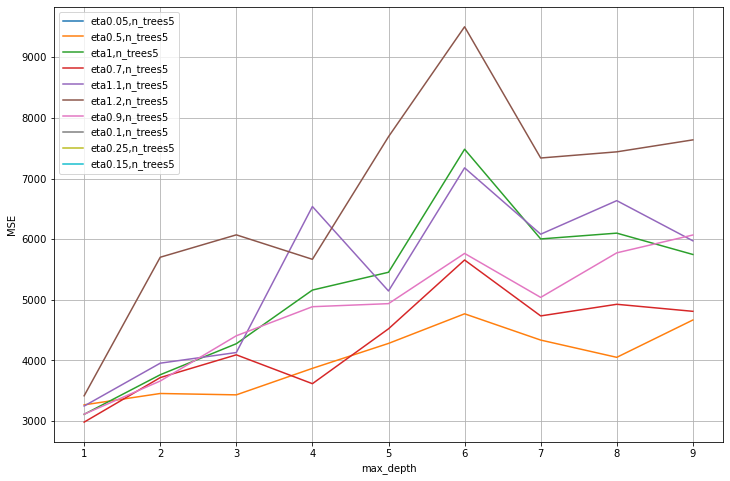

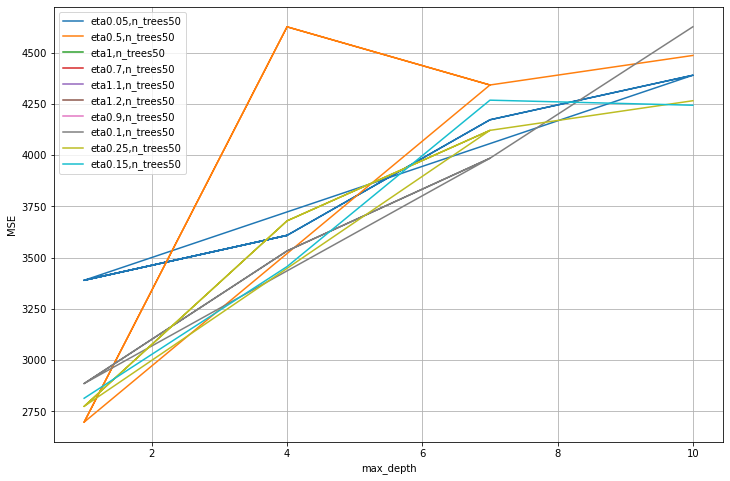

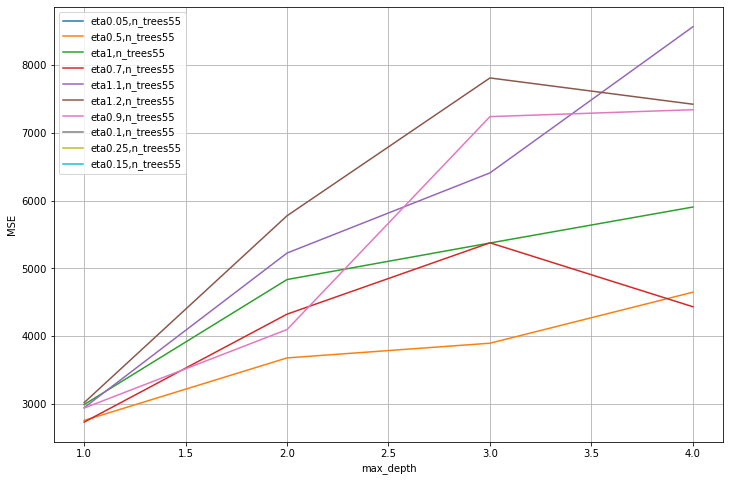

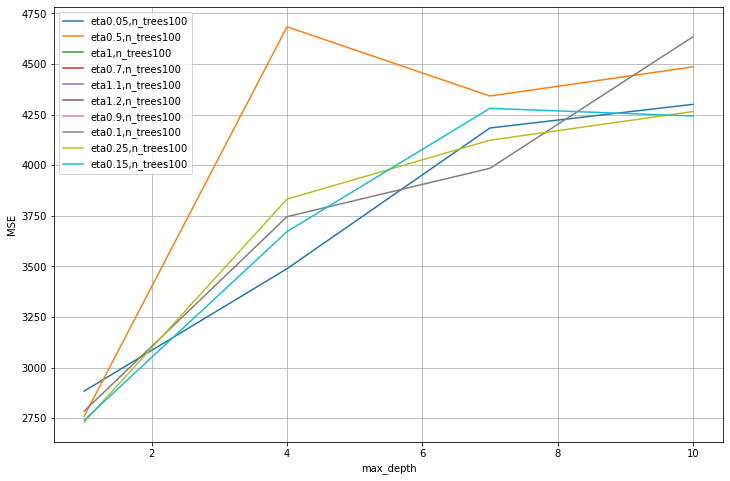

In [110]:
for i in [5,50,55,100]:
    plt.figure(figsize=(12, 8))
    plt.grid()
    plt.xlabel('max_depth')
    plt.ylabel('MSE')
    for j in [0.05,0.5,1,0.7,1.1,1.2,0.9,0.1,0.25,0.15]: 
        plt.plot(save_result[(save_result['eta']==j)&(save_result['n_trees']==i)]['max_depth']\
                 ,save_result[(save_result['eta']==j)&(save_result['n_trees']==i)]['MSE'], label =f'eta{j},n_trees{i}')
    plt.legend()

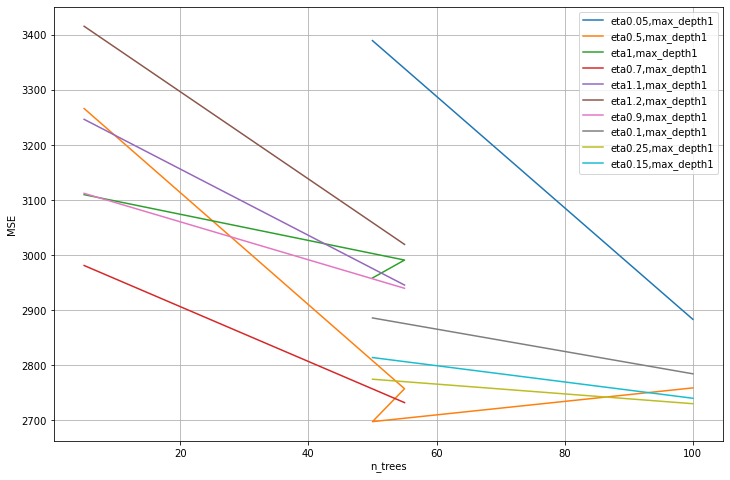

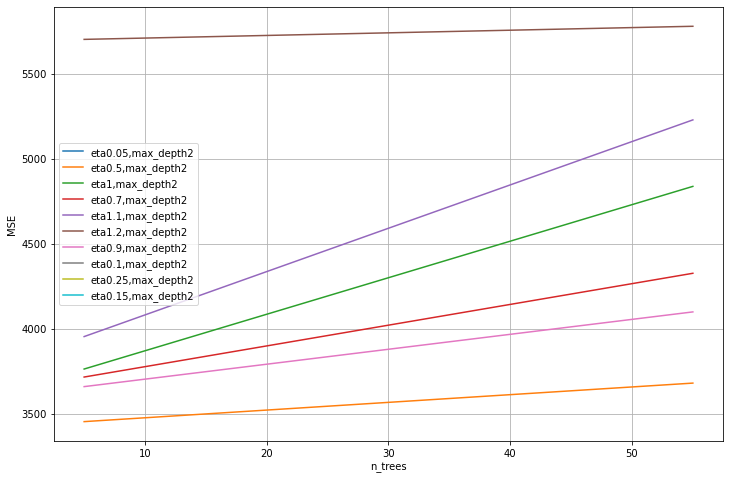

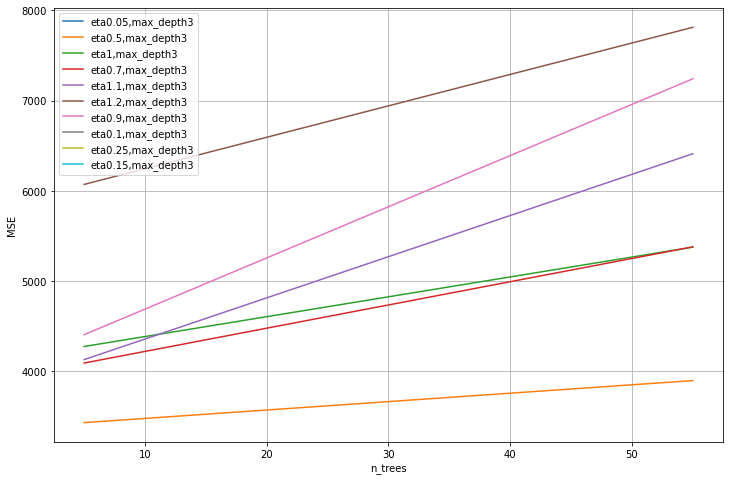

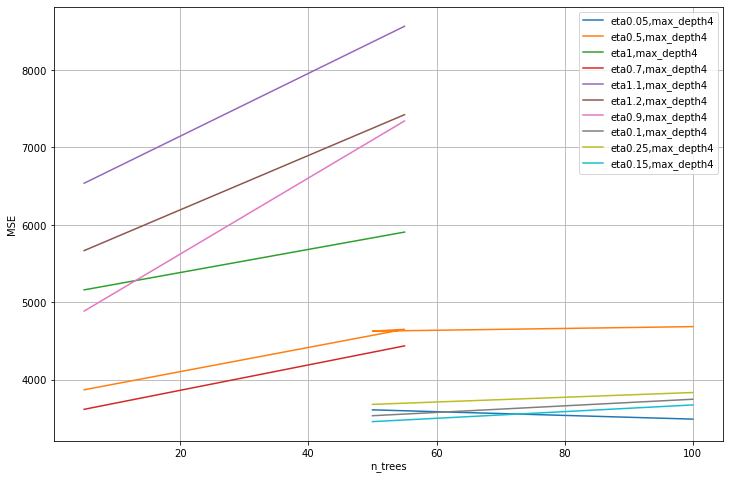

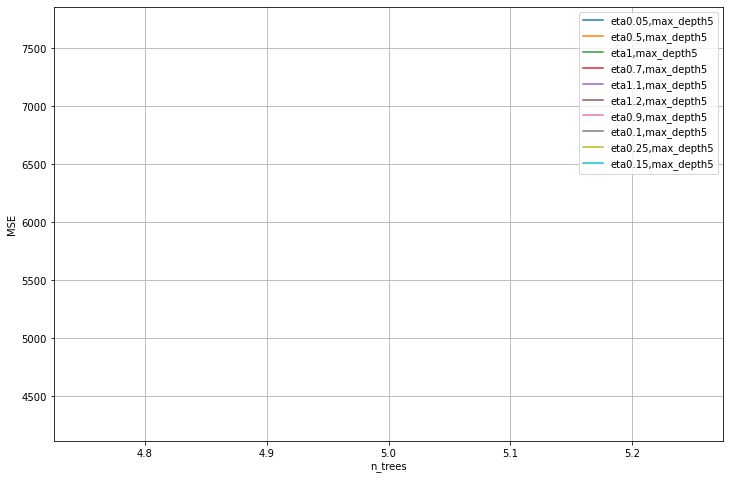

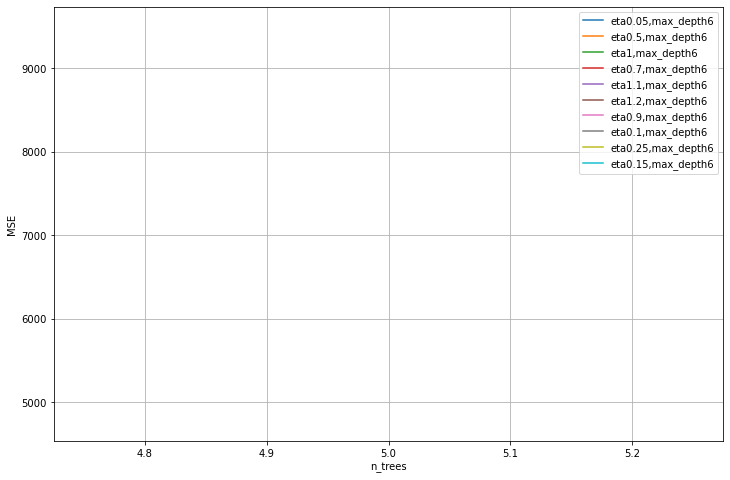

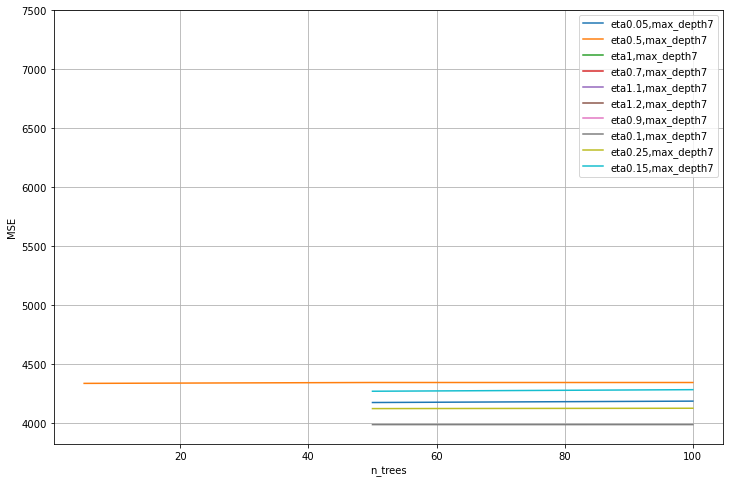

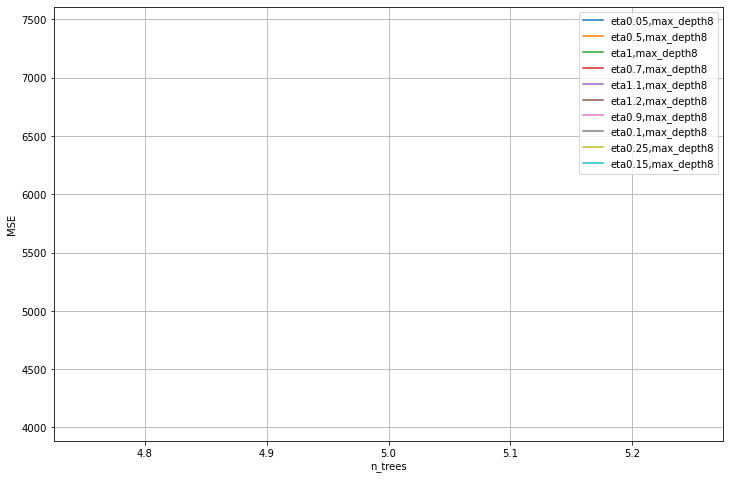

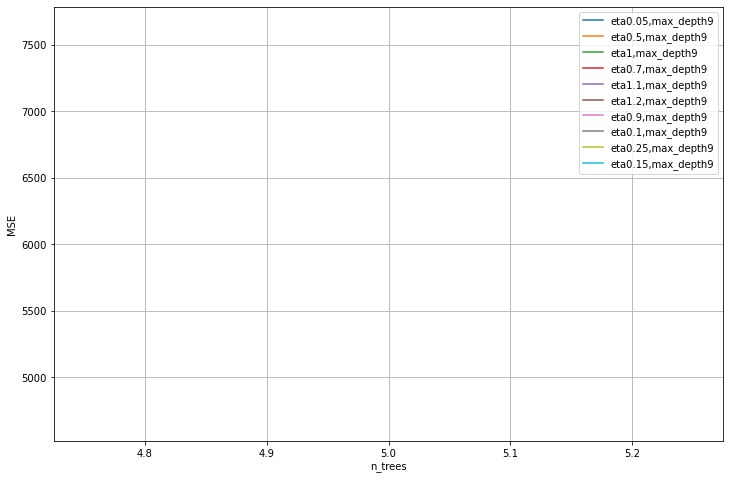

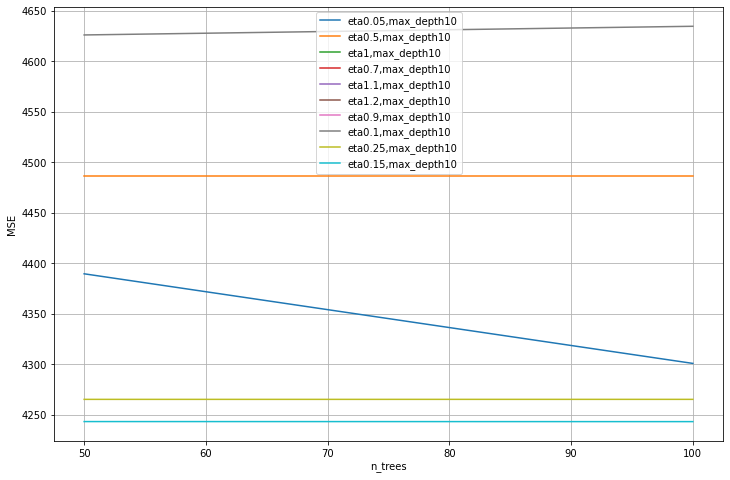

In [113]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    plt.figure(figsize=(12, 8))
    plt.grid()
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    for j in [0.05,0.5,1,0.7,1.1,1.2,0.9,0.1,0.25,0.15]: 
        plt.plot(save_result[(save_result['eta']==j)&(save_result['max_depth']==i)]['n_trees']\
                 ,save_result[(save_result['eta']==j)&(save_result['max_depth']==i)]['MSE'], label =f'eta{j},max_depth{i}')
    plt.legend()